***Finding Outliers using STD and Z-score***


***For normal dist IQR is not preffered***

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
data=pd.read_csv('heights.csv')
data

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Text(0, 0.5, 'Count')

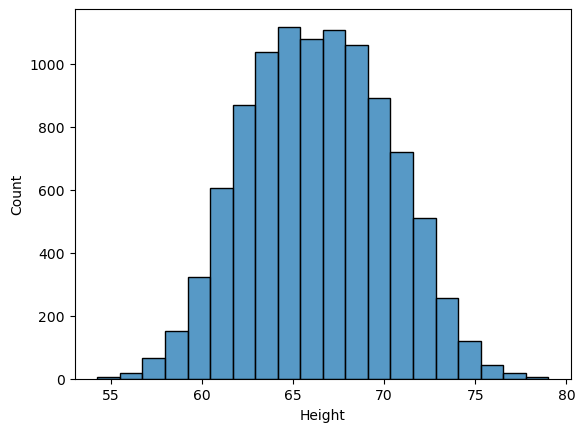

In [7]:
sns.histplot(data.height, bins=20)
plt.xlabel('Height')
plt.ylabel('Count')

***If data is Normal Distributed---> Better to use STD or Z-score***

In [12]:
data.height.mean()

66.367559754866

In [14]:
data.height.std()

3.847528120795573

**Higher limit = mean + 3*STD**

**Lower limit - mean- 3*STD**

In [17]:
upper_lim=data.height.mean() + 3*data.height.std()
lower_lim=data.height.mean() - 3*data.height.std()
upper_lim,lower_lim

(77.91014411725271, 54.824975392479274)

In [28]:
data[(data.height>upper_lim)|(data.height<lower_lim)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [34]:
no_outliers=data[(data.height<=upper_lim)&(data.height>=lower_lim)]
no_outliers

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


### Outliers using Z-score

**Better to use STD**

In [37]:
data['Zscore']=(data.height -data.height.mean())/data.height.std()

In [39]:
data

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


**Check which data are lower or above +-3, those data are outliers**

In [63]:
data[(data.Zscore>3)|(data.Zscore<-3)]

,gender,height,Zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


**Remove Outliers**

In [75]:
data.Zscore 

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: Zscore, Length: 10000, dtype: float64

In [77]:
no_outliers = data[(data.Zscore>=-3)|(data.Zscore<=3)]

In [79]:
no_outliers

,gender,height,Zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
